In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
#Modelos
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB

#Rede Neral
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#pré processamento , metricas...
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score,make_scorer
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression


In [2]:
#Lendo dataset e atribuindo a variável df
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###  Aqui podemos ver que se trata de uma dataset extremamente desbalanceado, com a maioria dos dados pertencento a classe 0 .

In [3]:

df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#tatal de dados nullos
df.isnull().sum().sum()

0

# Análise Exploratória

### Usando heatmap ,biblioteca seaborn para visualizar como estão correlacionadas as variáveis do dataset

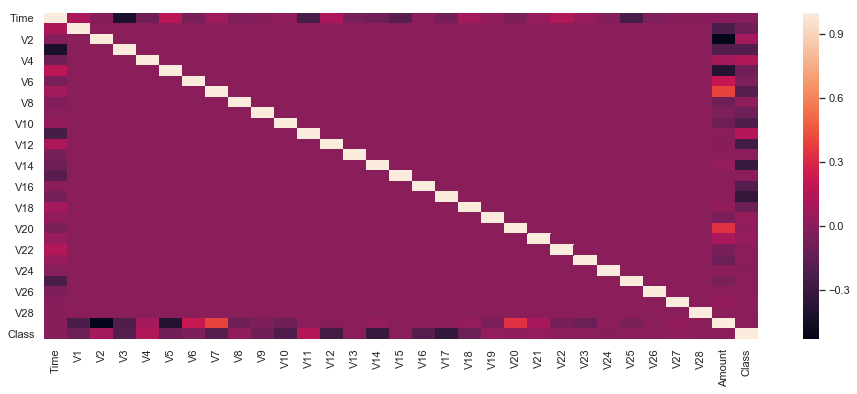

In [5]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr());

### Aqui podemos notar que não existe correlação forte entre as variáveis presentes no dataset

### Plotando as distribuições das quantidades gastas nas trasações com cartões 

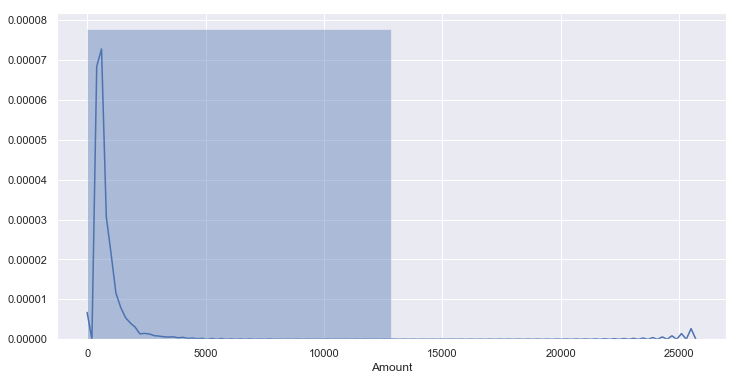

In [6]:
plt.figure(figsize=(12,6))
sns.distplot(df['Amount'],bins=2);

### Aqui vemos claramente que a grande maioria das trasações ocorre em valores  menos que 3.000 euros e ainda um outro pequeno movimento de gastos na casa dos 25.000.

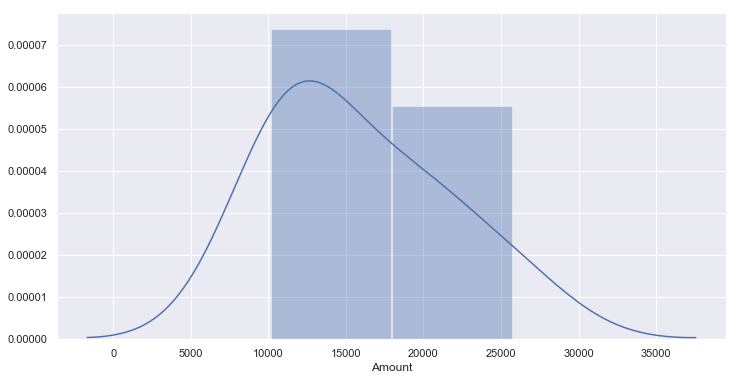

In [7]:
# gráfico da distribuição de valores gastos acima de 10000 euros.
plt.figure(figsize=(12,6))
sns.distplot(df[df['Amount'] > 10000]['Amount']);
plt.savefig('distplotMaior10k')

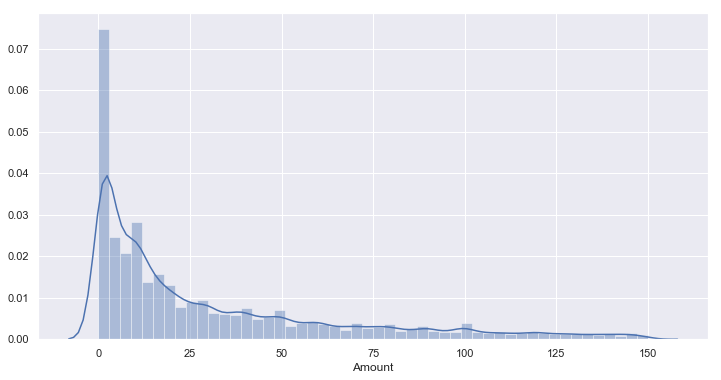

In [9]:
# Gráfico mostrando as distribuições de valores gastos abaixo de 150 euros.
plt.figure(figsize=(12,6))
sns.distplot(df[df['Amount'] < 150]['Amount'],bins=50);

C:\Users\wilson\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wilson\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,50,'Variável V1')

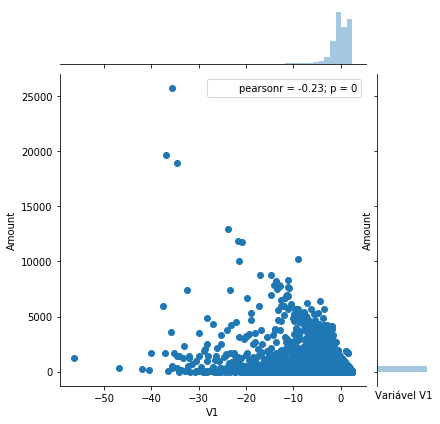

In [3]:
sns.jointplot(df['V1'],df['Amount'],data=df);
plt.ylabel("Amount")
plt.xlabel("Variável V1")

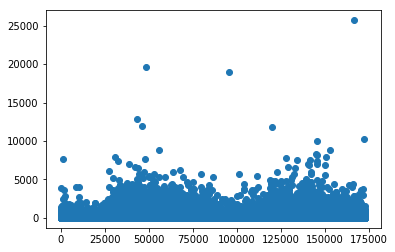

In [6]:
plt.scatter(df['Time'],df['Amount'])

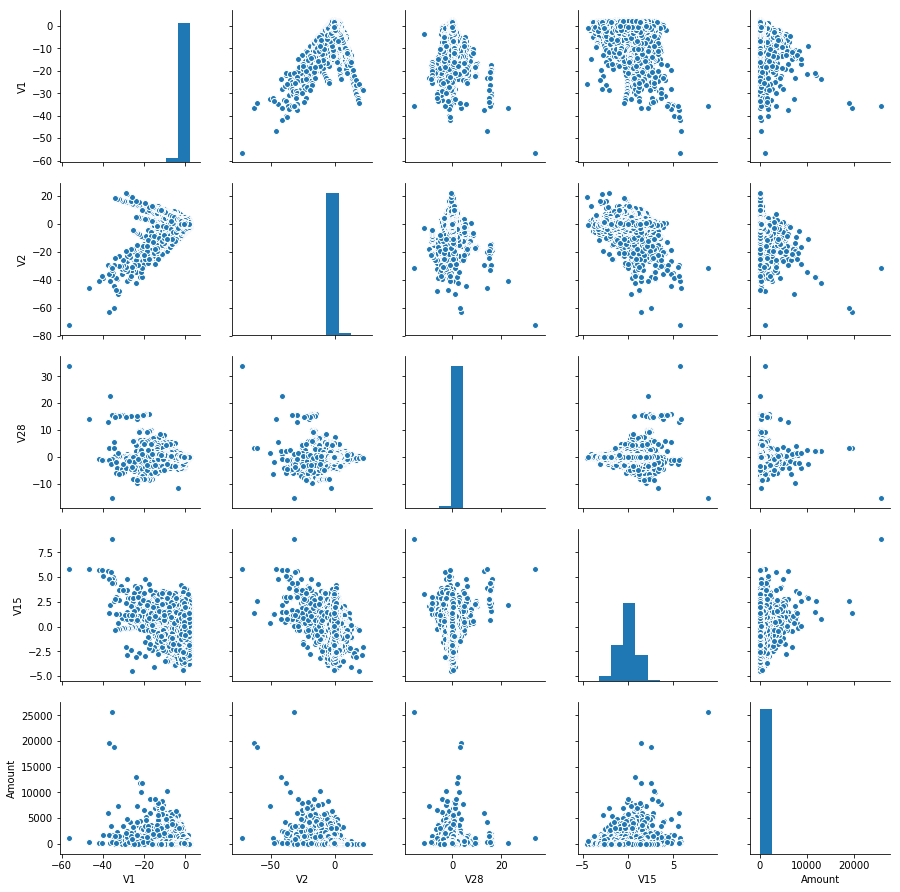

In [15]:
# Utilizando pairplot para verificar como algumas das variáveis se relacionam entre si 
sns.pairplot(df[['V1','V2','V28','V15','Amount']]);

Text(0.5, 1.0, 'Classe 0 e 1 para gastos Menores que 3000 ')

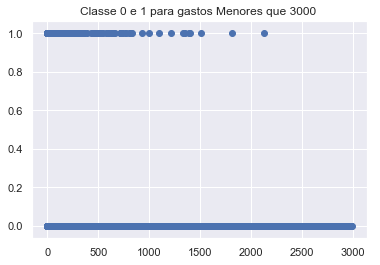

In [10]:
df_m = df[df['Amount']<3000]
plt.scatter(df_m['Amount'],df_m['Class']);
plt.title("Classe 0 e 1 para gastos Menores que 3000 ")

### Claramente podemos notar que grande parte dos da classe target estão abaixo dos 1000 euros, com algumas incidências indo até 2500.

# Benchmark
### Como ponto de partida utilizarei o trablho do Sr. Rafael Buck disponível em
#### https://github.com/rafaelmartinsbuck/credit-card-fraud-detection/blob/master/Credit_card_fraud_detection.ipynb
### Onde o presente trabalho apresentou os seguintes resultados:
- AUC ROC = 0.893
- 80% transações fraudulentas detectadas com sucesso.
- 4 em cada 5 tranasações fraudulentas detectadas

 # Testando Modelos e medindo performace inicial:
 - RandomFlorestClassifier: Arvores de decisão são é sem dúvida um dos modelos mais classicos e amplamente estudados e utilizados em machine Learning. No nosso caso usaremos RandomFlorestClassifier que é um modelo muito mais robusto de Arvore de decisão e com uma dendência menor ao overfitting que sem dúvidas são um dos pontos mais negativos das Arvores de descsão.
 - KMeans: Esse modelo de custer, consegue encontrar agrupamentos nos dados, bastando para isso, informarmos a quantidade de Clusters que desejamos. Por se tratrar de um modelo muito simples para utilização e também de conhecermos bem quais classes desejamos encontrar, pode ser considerado um bom modelo para testar aqui.
 - KNeighborsClassifier: Modelo baseado na distância Euclidiana, esse é outro modelo de fácil implementação e com uma abordagem diferente dos outros vistos até aqui, já que tenda encontrar a visinho (s) mais próximo da classe target, pode ser interessante para nossa abordagem já os alvos do target tendem a estar uma faixa não muito dispersa.
 - LogisticRegression: Esse modelo é uma espécie benchmarck natural em modelos de classificação e para um primeiro estudo de caso sempre é bom tê-lo em vista. 
 - Redes Neurais com Keras: Esse é um dos modelos mais badalados da atualidade e onde muitos estudos e artigos vem sendo feitos, vamos ver como se comporta diante do problema atual, visto que redes neurais são a grande promessa no campo da inteligência Artificia e Machine Learning. A escolha do pacote keras é por sua simplicide e robustes.
 - GaussianNB: Simples erápido, possui um desempenho relativamente maior do que outros classificadores. Além disso, o Naive Bayes só precisa de um pequeno número de dados de teste para concluir classificações com uma boa precisão. Não leva em consideração a correlção entre as características,tra
A principal característica do algoritmo, e também o motivo de receber “naive” (ingênuo) no nome, é que ele desconsidera completamente a correlação entre as variáveis (features). Ou seja, se determinada fruta é considerada uma “Maçã” se ela for “Vermelha”, “Redonda” e possui “aproximadamente 10cm de diâmetro”, o algoritmo não vai levar em consideração a correlação entre esses fatores, tratando cada um de forma independente.

### Testando Random Forest Classifier

In [6]:
# Utilizando rando seed para reprodução de dos resultados.
seed = 66
np.random.seed(seed)

# dividindo as dados em dados treino e de test para esse objetivo para avaliar como se comportar as previsões
X_train,X_test,y_train,y_test = train_test_split(df.drop('Class',axis=1), df['Class'],test_size=.3, random_state=seed)

In [4]:
forest = RandomForestClassifier(random_state=seed).fit(X_train,y_train)  
forest_pred = forest.predict(X_test)

### Métrica score parece muito boa, mas não é adquada para nosso problema específico. Por isso de nossa escolha da métrica ROC AUC, muito mais adequalda para um dataset tão desbalanceado.


In [14]:
forest.score(X_test,y_test)

0.9994382219725431

In [16]:
confusion_matrix(y_test,forest_pred)

array([[85283,     8],
       [   40,   112]], dtype=int64)

In [8]:
roc_auc_score_auc_score(y_test,forest_pred)

0.8683741543656424

### Testando modelo com Kmeans cluster

In [43]:
kmeans_model = KMeans(n_clusters=2).fit(X_train,y_train)
k_predict = kmeans_model.predict(X_test)
roc_auc_score(y_test,k_predict)

0.712559062503664

### Testando modelo com Logistic Regression

In [44]:
logistic = LogisticRegression(random_state=66).fit(X_train,y_train)
log_pred = logistic.predict(X_test)
roc_auc_score(y_test,log_pred)

0.802526057849011

### Testando Modelo KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
knn_pred = knn.predict(X_test)
roc_auc_score(y_test,knn_pred)

0.8618362429799159

### Testando Modelo Com Redes Neurais, usando Keras

In [44]:
model = Sequential()
model.add(Dense(30, input_dim= 30))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train,y_train,validation_data=(X_test,y_test))

Train on 199364 samples, validate on 85443 samples
Epoch 1/1
199364/199364 [==============================] - 18s 90us/step - loss: 0.1674 - acc: 0.9895 - val_loss: 0.0287 - val_acc: 0.9982


In [60]:
confusion_matrix(y_test,model.predict_classes(X_test))

AttributeError: 'RandomForestClassifier' object has no attribute 'predict_classes'

### Testando GaussianNB

In [61]:
gaussianNB = GaussianNB().fit(X_train,y_train)
gaussianNB_p = gaussianNB.predict(X_test)
roc_auc_score(y_test,gaussianNB_p)

0.8025561020506267

# Aprimoramento

### Transformando caracteristicas com StandardScaler 
- Escalando colunas para mesma escala a fim de evitar discrepancias entre as escalas, modelos como redes neurais, logistic regression e kmens funcionam melhor quando todos os dados estão em uma escala.

In [7]:
scaler = StandardScaler().fit_transform(df.drop('Class',axis=1))
df_scaler = pd.DataFrame(scaler,columns= df.drop('Class',axis=1).columns)
df_scaler.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


### Usando ExtraTreesClassifiers para identificar característimas mais importantes para o modelo

In [14]:
forest = ExtraTreesClassifier(random_state= seed,max_depth=25,min_samples_split=5,n_estimators=200)
forest.fit(df_scaler , df['Class'])
importancias = forest.feature_importances_

In [15]:
index = df.iloc[:,:30].columns.values
df_import = pd.DataFrame(importancias,index=index,columns=['importancias'])
df_import.sort_values(by='importancias',ascending=False, inplace= True)
df_import

,importancias
V17,0.155018
V14,0.128258
V12,0.117556
V16,0.086002
V11,0.075966
V10,0.067517
V18,0.046372
V9,0.037330
V4,0.035638
V3,0.034077


### Aqui listamos e ordenamos as características para nosso modelo usando ExtraTreeClassifiers, vamos tentar verificar qual seria um bom número de características para usar em nosso modelo usando apenas as mais importantes.

# Testando modelo com menos Características

In [146]:
# Testando Roc AUC para diferentes quantidades(1 até 14) de características para modelos RandomForest e KMeans Cluster
f = []
k = []
for i in range(1,15):
    indices_imp = df_import.sort_values(by='importancias',ascending=False).head(i).index
    X_train,X_test,y_train,y_test = train_test_split(df.loc[:,indices_imp], df['Class'],test_size=.3,random_state=seed)
    #treinando e medindo recall Decision tree
    forest.fit(X_train,y_train)
    f.append(roc_auc_score(y_test, forest.predict(X_test)))
    
    #treinando e medindo recall Decision tree
    kmeans_model.fit(X_train,y_train)
    k.append(roc_auc_score(y_test, kmeans_model.predict(X_test)))

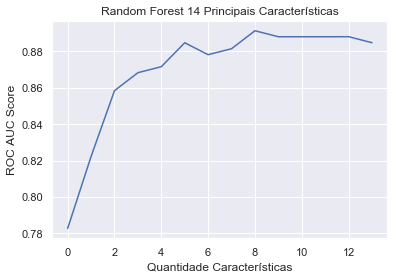

In [147]:
plt.plot(f)
plt.title("Random Forest 14 Principais Características")
plt.ylabel('ROC AUC Score')
plt.xlabel('Quantidade Características');

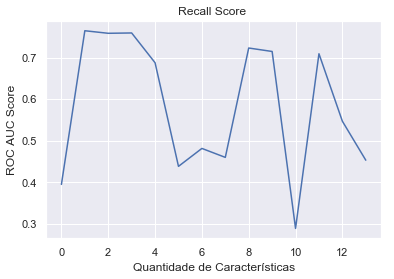

In [148]:
plt.plot(k)
plt.title("Recall Score ")
plt.ylabel('ROC AUC Score')
plt.xlabel('Quantidade de Características');

### Por volta das 8 parece ser um bom número para tentarmos treinar novamente nossos modelos, vamos ver se com a redução da quantidade de características é possível também reduzir o ruído e assim fazer nossos modelos trabalharem melhor.

In [16]:
### pegando o nome das 8 colunas mais importantes segundo ExtraTreeClassifier
indices_imp = df_import.head(9).index
X_train,X_test,y_train,y_test = train_test_split(df.loc[:,indices_imp], df['Class'],test_size=.3, random_state=seed)

### Testando RandomForestClassifier com 10 principais características

In [23]:
model = RandomForestClassifier(random_state=seed)
model.fit(X_train,y_train)
predict = model.predict(X_test)
roc_auc_score(y_test,predict)

0.8848097982202109

### Testando KMeans Cluster com 10 principais características

In [24]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(X_train,y_train)
k_predict = kmeans_model.predict(X_test)
roc_auc_score(y_test,k_predict)

0.7222985133249697

### Testando modelo com Logistic Regression

In [26]:
logistic = LogisticRegression(random_state=seed).fit(X_train,y_train)
log_pred = logistic.predict(X_test)
roc_auc_score(y_test,log_pred)

0.7959471104805901

### Testando Keras 

In [27]:
keras = Sequential()
keras.add(Dense(30, input_dim= X_train.shape[1]))
keras.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) 
keras.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
keras.fit(X_train,y_train,validation_data=(X_test,y_test))

Train on 199364 samples, validate on 85443 samples
Epoch 1/1
199364/199364 [==============================] - 19s 95us/step - loss: 0.0256 - acc: 0.9966 - val_loss: 0.0056 - val_acc: 0.9994


In [28]:
confusion_matrix(y_test,keras.predict_classes(X_test))

array([[85272,    19],
       [   34,   118]], dtype=int64)

In [29]:
roc_auc_score(y_test,keras.predict_classes(X_test))

0.8880465113552426

### Testando Modelo para KNeighborsClassifier 

In [30]:
knn = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
knn_pred = knn.predict(X_test)
roc_auc_score(y_test,knn_pred)

0.868409328065095

### Nossa estratégia de reduzir o número de características para ter sido uma boa escolha visto que funcionou positivamente em todos nossos modelos.

# Validando o modelo
### Cross Validation

In [31]:
#Definindo métrica roc_auc_score para usar em Cross_val_score
auc_roc = make_scorer(roc_auc_score)

In [33]:
# Essas são as 8 colunas que estamos utilizando 
df.loc[:,indices_imp].head(3)

,V17,V14,V12,V16,V11,V10,V18,V9,V4
0,0.207971,-0.311169,-0.617801,-0.470401,-0.551600,0.090794,0.025791,0.363787,1.378155
1,-0.114805,-0.143772,1.065235,0.463917,1.612727,-0.166974,-0.183361,-0.255425,0.448154
2,1.109969,-0.165946,0.066084,-2.890083,0.624501,0.207643,-0.121359,-1.514654,0.379780
3,-0.684093,-0.287924,0.178228,-1.059647,-0.226487,-0.054952,1.965775,-1.387024,-0.863291
4,-0.237033,-1.119670,0.538196,-0.451449,-0.822843,0.753074,-0.038195,0.817739,0.403034


In [34]:
scores = cross_val_score(forest, df.loc[:,indices_imp], df['Class'], cv=5, scoring= auc_roc) 
scores.mean()

0.8910114758168101

In [35]:
scores = cross_val_score(kmeans_model, df.loc[:,indices_imp], df['Class'], cv=5, scoring= auc_roc) 
scores.mean()

0.44291734951376993

In [36]:
scores = cross_val_score(knn, df.loc[:,indices_imp], df['Class'], cv=5, scoring= auc_roc) 
scores.mean()

0.8564609203153977

In [37]:
scores = cross_val_score(logistic, df.loc[:,indices_imp], df['Class'], cv=5, scoring= auc_roc) 
scores.mean()

0.7943633037316854

# Realizando GridSearchCV para otimizar parametro
- Vamos tentar otimizar nossa busca pelos melhores parâmetros e assim melhorar o desempenho de nosso modelo.

In [ ]:
param_grid = {
            "n_estimators": [100,150,200],
            "max_depth": [3, 5,10,25,50],
            "min_samples_split": [2,5,10,50]
}
grid_search = GridSearchCV(forest, param_grid, scoring= auc_roc)
grid_search.fit(X_train, y_train)

classifier_rf = grid_search.best_estimator_ 
grid_search.best_params_, grid_search.best_score_

In [ ]:
param_grid = { "n_neighbors": [1,2,3,4,5,6,7,8,10,15,20] }
grid_search = GridSearchCV(knn, param_grid, scoring= auc_roc)
grid_search.fit(X_train, y_train)

classifier_knn = grid_search.best_estimator_ 
grid_search.best_params_, grid_search.best_score_

# Validando Modelos Otimizados Otimizada por gridSearchCV

### RandomFlorest Otimizada

In [38]:
tree_otimized=RandomForestClassifier(random_state= seed,max_depth=25,min_samples_split=5,n_estimators=200).fit(X_train,y_train) 

In [39]:
scores = cross_val_score(tree_otimized, df.loc[:,indices_imp], df['Class'], cv= 5, scoring= auc_roc) 
scores.mean()

0.8930264019985932

In [40]:
tree_pred = tree_otimized.predict(X_test)

In [41]:
pd.DataFrame(confusion_matrix(y_test,tree_pred),columns=["True","False"],index=["True","False"])

,True,False
True,85278,13
False,37,115


In [42]:
roc_auc_score(y_test,tree_pred)

0.8782132640020636

### Usando KNeighborsClassifier otimizado.

In [43]:
knn_otimized = KNeighborsClassifier(n_neighbors=5)
k_scores = cross_val_score(knn_otimized, df.loc[:,indices_imp], df['Class'], cv= 5, scoring= auc_roc) 
k_scores.mean()

0.8737032734701318

In [44]:
knn_otimized.fit(X_train,y_train)
knn_pred = knn_otimized.predict(X_test)
pd.DataFrame(confusion_matrix(y_test,knn_pred),columns=["True","False"],index=["True","False"])

,True,False
True,85280,11
False,29,123


In [45]:
roc_auc_score(y_test,knn_pred)

0.9045407780422318

In [46]:
k_scores

array([0.92896759, 0.8888801 , 0.81092553, 0.8724226 , 0.86732056])

### Tentando também melhorar o desempenho com nossa rede Neural

In [47]:
keras2 = Sequential()
keras2.add(Dense(100, input_dim= X_train.shape[1], kernel_initializer='normal', activation='relu'))
keras2.add(Dense(50, kernel_initializer='normal', activation='relu'))
keras2.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
keras2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
keras2.fit(X_train,y_train)

Epoch 1/1
199364/199364 [==============================] - 18s 91us/step - loss: 0.0081 - acc: 0.9993


In [49]:
k2_p = keras2.predict_classes(X_test)

In [50]:
confusion_matrix(y_test,k2_p)

array([[85266,    25],
       [   29,   123]], dtype=int64)

In [51]:
roc_auc_score(y_test,k2_p)

0.9044587060768428

### Testando GaussianNB Modelo vencedor

In [ ]:
gausian = GaussianNB()
g_scores = cross_val_score(gausian, df.loc[:,indices_imp], df['Class'], cv=10, scoring= auc_roc) 
g_scores.mean()

In [17]:
gausian = GaussianNB()
gausian.fit(X_train,y_train)
gausian_pred = gausian.predict(X_test)
pd.DataFrame(confusion_matrix(y_test,gausian_pred),columns=["True","False"],index=["True","False"])

,True,False
True,84711,580
False,25,127


In [28]:
plt.plot(np.arange(1,11),g_scores)
plt.ylabel("ROC AUC")

NameError: name 'g_scores' is not defined

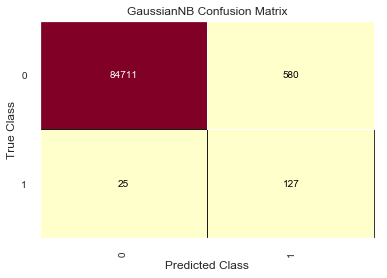

In [36]:
# Matriz de confusão para as para as duas classes preditas pelo modelo
v =  ConfusionMatrix(GaussianNB())
v.fit(X_train,y_train)
v.score(X_test,y_test)
v.poof()


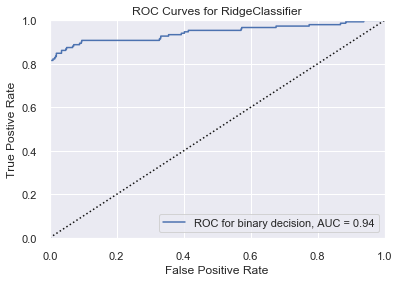

In [34]:
#Área sob a curva Roc 

visualizer = ROCAUC(RidgeClassifier(), classes=classes,micro = False, macro = False,per_class = False)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

# Conclusões

A pesar de usar estratégias bastante simples conseguimos um bom resultado final em nossa análise, o que leva a crer poderíamos
atuar positivamente junto a instuição financeira prevendo com sucesso possíveis fraudadores. O vencedor, usando-se a métrica ROC AUC foi o modelo GaussianNB que consegui uma uma média de 92% de conformidade com a métrica, usando validação cruzada com parâmetro cv = 10.
O interessante é que mesmo RandomForest e KNeighbors também conseguiram bons resultados apesar de se sairem pior, quando usada a validação cruzada.
Com toda certeza todo o mérito desse resultado se encontra em duas estratégias simples:
- Escalonamento das características usando StandardScaler
- Utilização apenas das 8 características mais significativas para o modelo usando ExtraTreeClassifier
